In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/MyWorkSpace/Technical Analysis/THY Stock Price History.csv")
df = df.iloc[::-1].reset_index(drop=True)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/20/2025,305.75,305.00,306.00,301.75,27.88M,0.74%
1,01/21/2025,301.25,304.25,305.50,299.75,24.19M,-1.47%
2,01/22/2025,305.25,301.75,305.75,300.50,23.40M,1.33%
3,01/23/2025,309.75,306.00,311.75,303.00,38.92M,1.47%
4,01/24/2025,309.00,310.00,311.00,306.00,25.72M,-0.24%


In [3]:
prices = df["Price"].values.reshape(-1, 1)
size = len(prices)
ratio = 0.8 # for train
train_prices = prices[:int(size*ratio)]
test_prices  = prices[int(size*ratio):]

print("Lenght of Train Data:",len(train_prices))
print("Lenght of Test Data:",len(test_prices))

Lenght of Train Data: 200
Lenght of Test Data: 51


In [4]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_prices)
test_scaled  = scaler.transform(test_prices)

In [5]:
def create_direct_sequences(data, input_len=30, output_len=30):
    X, y = [], []
    for i in range(len(data) - input_len - output_len + 1):
        X.append(data[i : i + input_len])
        y.append(data[i + input_len : i + input_len + output_len])
    return np.array(X), np.array(y)
X_train, y_train = create_direct_sequences(
    train_scaled,
    input_len=30,
    output_len=30
)
print(X_train.shape)  # (samples, 30, 1)
print(y_train.shape)  # (samples, 30, 1)

(141, 30, 1)
(141, 30, 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [18]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, 1)),
    Dropout(0.2),
    LSTM(32),
    Dense(30)  # direct forecast for 30 days
])

model.compile(
    optimizer="adam",
    loss="mse"
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,302 (118.37 KB)

 Trainable params: 30,302 (118.37 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
%%time
history = model.fit(
    X_train,
    y_train.squeeze(),  # (samples, 30)
    epochs=50,
    batch_size=16,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0445 - val_loss: 0.0208
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0390 - val_loss: 0.0093
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0377 - val_loss: 0.0248
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0443 - val_loss: 0.0109
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0349 - val_loss: 0.0576
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0610 - val_loss: 0.0091
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0386 - val_loss: 0.0176
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0371 - val_loss: 0.0081
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0343 - val_loss: 0.0156
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0364 - val_loss: 0.0139
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0310 - val_loss: 0.0497
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0561 - val_loss: 0.0082
E

In [24]:
last_30_train = train_scaled[-30:].reshape(1, 30, 1)
pred_30_scaled = model.predict(last_30_train)
pred_30 = scaler.inverse_transform(
    pred_30_scaled.reshape(-1, 1)
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [25]:
real_30 = test_prices[:30]

comparison = pd.DataFrame({
    "real": real_30.flatten(),
    "predicted": pred_30.flatten()
})

print(comparison.head())

     real   predicted
0  289.50  280.328400
1  278.25  280.605499
2  273.00  277.689941
3  268.00  275.202942
4  271.00  274.545959


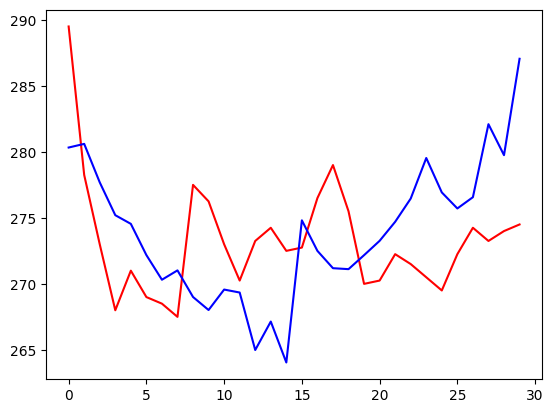

In [26]:
plt.plot(comparison["real"],c="red")
plt.plot(comparison["predicted"],c="blue")